In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import random

import seaborn as sns

from sklearn.datasets import fetch_california_housing

from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import linear_model
from sklearn.linear_model import LassoCV


In [2]:
#link to collab notebook by ian https://colab.research.google.com/drive/1EiIOylUoyYlacFik1VgGPlvxKta88T23?usp=sharing#scrollTo=WFoZMAhBSjYD 

california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
#information about the dataset
print(california['DESCR'])


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
#Do Filling Missing Values below this

In [5]:
#After some deliberation we noticed that there were no missing values so we randomly set sone NaN values then fixed them
# df.isnull().sum()

In [6]:
# ix = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
# for row, col in random.sample(ix, int(round(.1*len(ix)))):
#     df.iat[row, col] = np.nan

In [7]:
# df.isnull().sum()

In [8]:
# df.fillna(df.mean(), inplace=True)

In [9]:
# df.isnull().sum()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


there are 20640 instances in each column hence no null values

we skipped hot encoding since no encoding was required and all data was of the same dtype(float)

In [11]:
#Do feature selection Below this

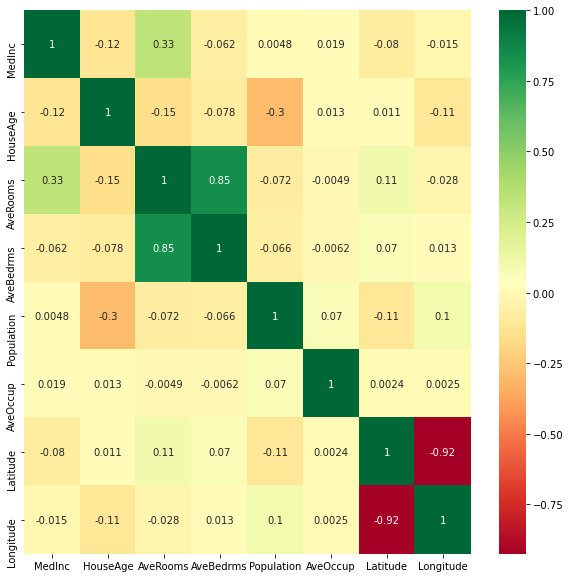

In [12]:
#heatmap to show colinnearity in columns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

we dropped the averagebedrooms column since it has a high colinearity to the averagerooms column

In [13]:
df=df.drop(['AveBedrms'], axis=1)
df

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32


In [14]:
#Do feature extraction below this

In [15]:
#get target values
target=pd.DataFrame(california.target,columns=['Median house value'])

In [16]:
#Standardize Features
X=PowerTransformer().fit_transform(df)
X_std=X.copy()
Y=PowerTransformer().fit_transform(target)

In [17]:
# # Create a scaler object
# sc = StandardScaler()
# # Fit the scaler to the features and transform
# X = sc.fit_transform(df)

In [18]:
pca_var = PCA(0.9)
# Fit the PCA and transform the data
principal_components= pca_var.fit_transform(X)

#number of components
pca_var.n_components_

5

In [19]:
#Merge PCA data columns with the target data

pca=PCA(n_components=5)
pc_s=pca.fit_transform(X)
pca_data=pd.DataFrame(pc_s,columns=['PC1','PC2','PC3','PC4','PC5'])
target_data=pd.DataFrame(Y,columns=['Median House Value'])
final_data=pd.concat([pca_data,target_data],axis=1)

In [20]:
pca.explained_variance_ratio_

array([0.29400944, 0.24080826, 0.1750774 , 0.1348876 , 0.09672168])

Explained Variance
The amount of information carried by PC1 and PC2 is 29.4% and 24.0% as shown above

Wall time: 7.49 s


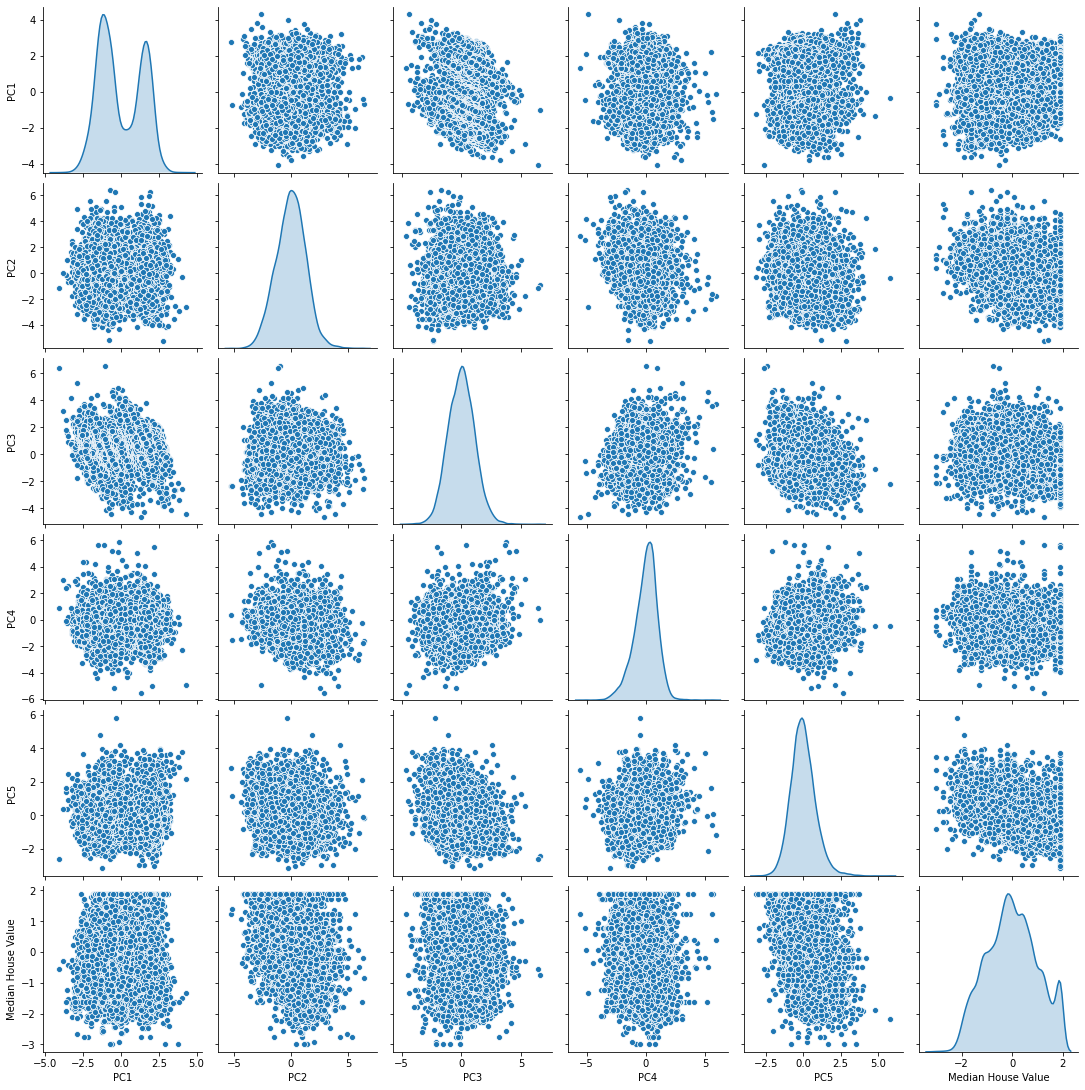

In [21]:
%%time
#Pair Plots

#g = sns.pairplot(final_data,x_vars=['PC1','PC2',' PC3',' PC4','PC5'],y_vars=target_data,diag_kind='kde')
g = sns.pairplot(final_data,diag_kind='kde')

In [22]:
final_data.describe()

,PC1,PC2,PC3,PC4,PC5,Median House Value
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,4.406467e-17,-1.101617e-17,1.101617e-17,6.609700e-17,2.203233e-17,-2.203233e-16
std,1.434631e+00,1.298360e+00,1.107068e+00,9.717296e-01,8.228513e-01,1.000024e+00
min,-4.082630e+00,-5.221732e+00,-4.627451e+00,-5.513857e+00,-3.157357e+00,-2.997447e+00
25%,-1.209969e+00,-8.557946e-01,-7.587795e-01,-5.640462e-01,-5.360178e-01,-7.379200e-01
50%,-4.136368e-01,2.875469e-02,2.106696e-03,1.025120e-01,-5.021952e-02,-1.611421e-02
75%,1.429447e+00,8.655191e-01,7.357675e-01,6.381604e-01,4.864649e-01,7.085479e-01
max,4.291404e+00,6.408274e+00,6.525049e+00,5.886272e+00,5.822281e+00,1.898584e+00


In [23]:
#do model selection below this

In [24]:
# all_features = list(final_data.columns)
# X=df
# X_2 = final_data.loc[:,all_features[0]:all_features[-2]].values
# y_2 = final_data.loc[:,[all_features[-1]]].values
# all_features
pca_Y=final_data['Median House Value']
pca_X=final_data.drop(['Median House Value'], axis=1)

In [25]:
#Splitting the data for training and testing
#to do
X_train, X_test, y_train, y_test = train_test_split(pca_X,pca_Y,test_size=0.2,random_state=1)
X_train.head()

,PC1,PC2,PC3,PC4,PC5
15961,1.769821,0.977065,-0.188969,1.402486,-0.590186
1771,1.673334,0.555650,0.215085,1.114198,-0.359010
16414,2.151702,-0.632769,-1.538211,0.715638,3.576945
5056,-1.373987,1.831172,1.131275,-0.688066,-0.904261
8589,-0.387493,-1.000750,-1.785326,0.171893,-0.836297


In [33]:
test_accuracy=[]
train_accuracy=[]

models = {
        'LinearRegression':linear_model.LinearRegression(),
        'Lasso':linear_model.Lasso(),
        'Ridge':linear_model.Ridge(),
        'ElasticNet':linear_model.ElasticNet(),
         }

model_accuracy = pd.DataFrame(columns=['Train', 'Test'], index=models)

def modelscores(train_accuracy,test_accuracy):
    for i in models:
        f=models[i].fit(X_train,y_train)
        #train
        train_accuracy.append(models[i].score(X_train,y_train))
        #test
        test_accuracy.append(models[i].score(X_test,y_test))
    model_accuracy['Train']=train_accuracy
    model_accuracy['Test']=test_accuracy
    
    train_accuracy.clear(),test_accuracy.clear()
    return model_accuracy

modelscores(train_accuracy,test_accuracy)

,Train,Test
LinearRegression,0.504491,0.491691
Lasso,0.000000,-0.001747
Ridge,0.504491,0.491693
ElasticNet,0.017478,0.015600


In [34]:
#Cross validation
result={}
kfold = KFold(n_splits=5)
for i in models:
    regressor = models[i]
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
    result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge,ElasticNet
0,0.503404,-0.000226,0.503404,0.017126


In [35]:
#hyperparameter tuning with grid search
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],'max_iter':[1000,1100,2000],'tol':[0.001,0.0001,0.000001]}
    grid = GridSearchCV(regressor,param_grid=lasso_params,cv=2,n_jobs=-1)
    results = grid.fit(X_train,y_train)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

,LinearRegression,Lasso,Ridge,ElasticNet
0,0.503404,0.492022,0.503404,0.017126


In [36]:
#hyperparameter tuning with Randomized search

for i in models:
  regressor = models[i]
  if i == 'Lasso':
    random = RandomizedSearchCV(regressor,param_distributions=lasso_params,cv=3,n_jobs=-1)
    results = random.fit(X_train,y_train)
    print(results.best_score_)
    print("Best Params are ", results.best_params_)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

0.5021591034982982
Best Params are  {'tol': 0.001, 'max_iter': 1100, 'alpha': 0.02}


,LinearRegression,Lasso,Ridge,ElasticNet
0,0.503404,0.492022,0.503404,0.017126
